Draw the spatial pattern and violin plot of 500hpa as an example.

# Imports

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt
import seaborn as sns

# Data

## spatial pattern

In [2]:
eof_all_all = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/allPattern/ind/first_pattern/all_all_eof.nc")


In [3]:
eof_all_all = eof_all_all.eof

In [4]:
eof_500hpa = eof_all_all.sel(hlayers = 50000)

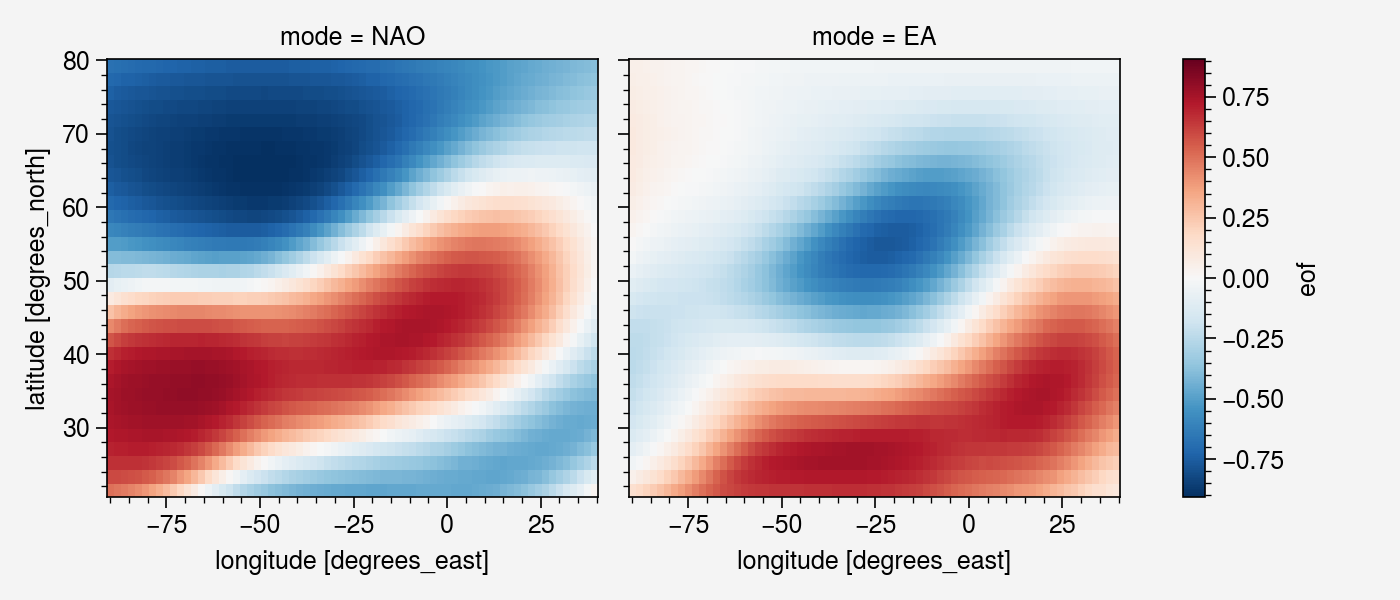

In [5]:
eof_500hpa.plot(x = 'lon',y = 'lat',col = 'mode')

## index

In [6]:
all_all_index = xr.open_dataset('/work/mh0033/m300883/3rdPanel/data/allPattern/ind/all_pattern/all_all_nonstd.nc')

In [7]:
all_all_index = all_all_index.pc

standardize with the mean and std of whole

In [8]:
def standardize(index,dim = ('time','ens')):
    """
    standardardize with the mean and std of 'time' and 'ens'.
    """
    mean = index.mean(dim = dim)
    std = index.std(dim = dim)
    index = (index-mean)/std
    return index

In [9]:
all_all_index = standardize(all_all_index)

In [10]:
first10_all_whole = all_all_index.isel(time = slice(0,10))
last10_all_whole = all_all_index.isel(time = slice(-10,all_all_index.time.size))

In [11]:
index_500hpa_first = first10_all_whole.sel(hlayers = 50000)
index_500hpa_last = last10_all_whole.sel(hlayers = 50000)

In [12]:
coords = xr.IndexVariable(dims = 'periods',data = ['first10','last10'])

In [13]:
index_500hpa = xr.concat([index_500hpa_first,index_500hpa_last],dim = coords)

In [14]:
index_500hpa = index_500hpa.to_dataframe().reset_index()

# 500hpa spatial pattern and violin plot

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


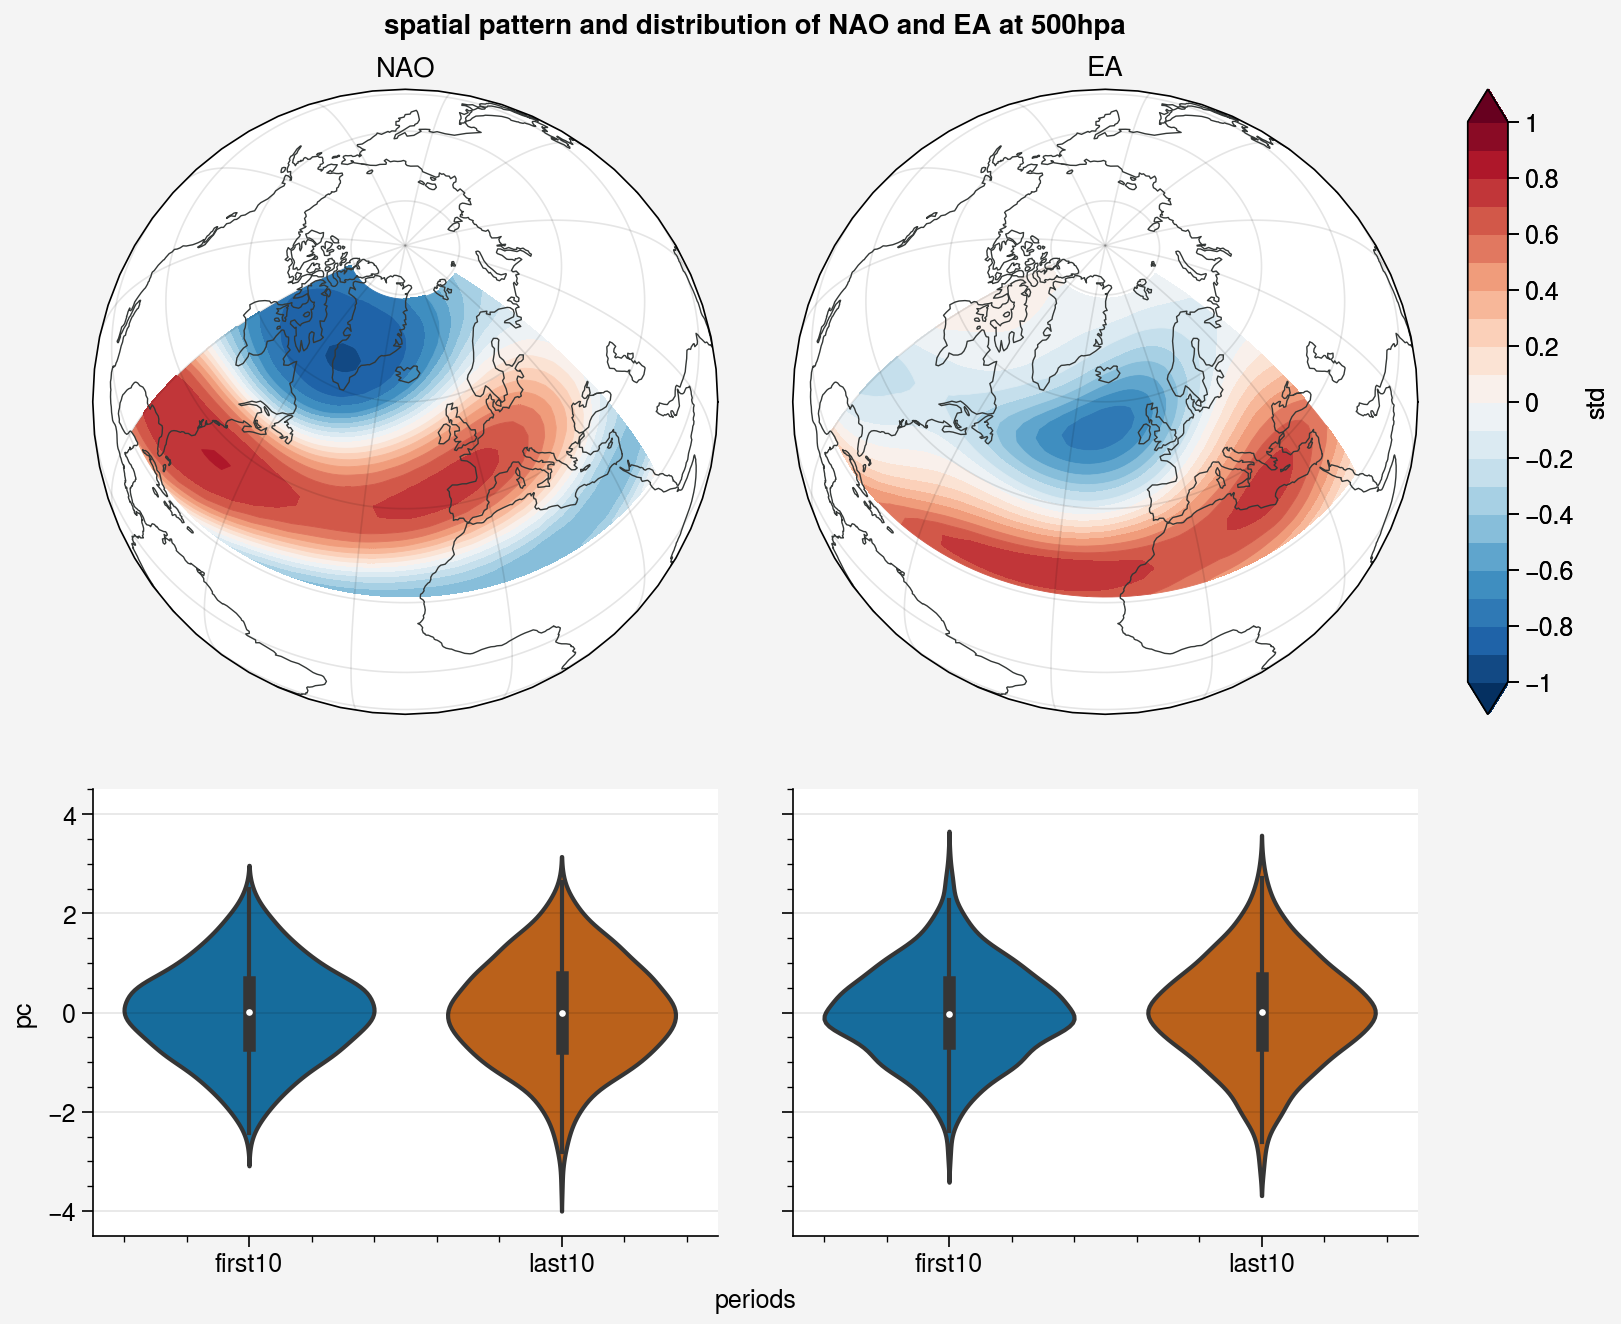

In [32]:
fig = pplt.figure(space=0, refwidth="25em",wspace = 3,hspace = 3)

fig.format(
    suptitle = 'spatial pattern and distribution of NAO and EA at 500hpa',
)

gs = pplt.GridSpec(ncols=2, nrows=2, hratios=(1.4, 1,))
modes = ["NAO", "EA"]

for i, mode in enumerate(modes):
    ax1 = fig.subplot(gs[0,i],proj = 'ortho',proj_kw = ({'lon_0':-20,'lat_0':60}))


    ax1.format(
        latlines = 20,
        lonlines = 30,
        coast = True,
        coastlinewidth = 0.5,
        coastcolor = 'charcoal',
        title = modes[i]
    )

    map = ax1.contourf(eof_500hpa.sel(mode = mode),
    levels = np.arange(-1,1.1,0.1),
    extend = 'both')
    if i == 1:
        ax1.colorbar(map, loc = 'r',title = 'std',ticks = 0.2, pad = 2)

    ax2 = fig.subplot(gs[1,i])
    violin =sns.violinplot(
        data = index_500hpa[index_500hpa['mode']==mode],
        y = 'pc',
        x = 'periods',
        ax = ax2,
        orient="v",
    )

    ax2.format(
        ylim = (-4.5,4.5)
    )

    ax2.spines.right.set_visible(False)
    ax2.spines.top.set_visible(False)

    plt.savefig("/work/mh0033/m300883/3rdPanel/docs/source/plots/first10_last10/ind_all_whole/spatial_pattern_violin500hpa.png",dpi = 300)


